In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')
import gc

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.groupby('Loan_Status').count()['Loan_ID']

Loan_Status
N    192
Y    422
Name: Loan_ID, dtype: int64

In [7]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002501,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
dicto = {'Y':1, 'N':0}
train['Loans'] = train['Loan_Status'].map(dicto)
del(dicto)

In [10]:
train.groupby(['Loan_Status','Married']).count()

Loan_ID  Gender  Dependents  Education  Self_Employed  \
Loan_Status Married                                                          
N           No            79      78          77         79             75   
            Yes          113     109         109        113            108   
Y           No           134     132         132        134            124   
            Yes          285     279         281        285            272   

                     ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Married                                                   
N           No                    79                 79          75   
            Yes                  113                113         106   
Y           No                   134                134         131   
            Yes                  285                285         278   

                     Loan_Amount_Term  Credit_History  Property_Area  Loans  
Loan_Status Married                                                          
N           No                     77              74             79     79  
            Yes                   109             105            113    113  
Y           No                    131             125            134    134  
            Yes                   280             257            285    285

In [11]:
#train['Self_Employed'].fillna('Missing',inplace=True)
#do For each Categorical Null Values

In [12]:
categorical_cols = list(train.drop(['Loan_ID','Loan_Status'],axis=1).describe(include=['O']).columns.values)
for cols in categorical_cols:
    train[cols].fillna('Missing',inplace=True)

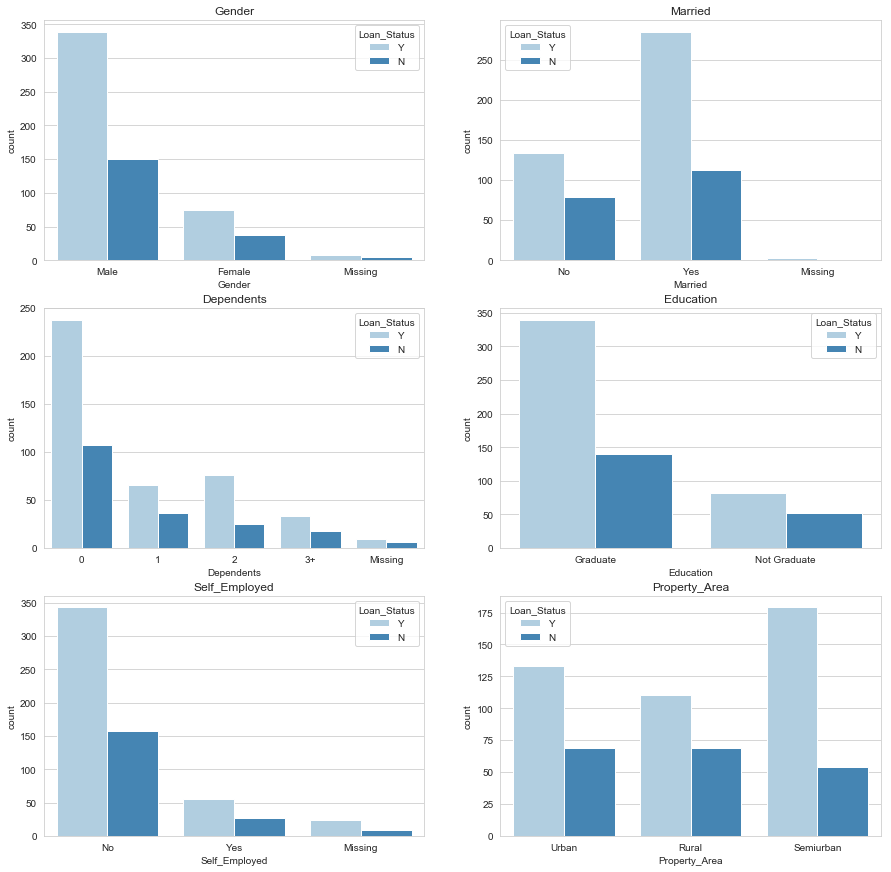

In [13]:
i = 0
j = 0
fig, ax =plt.subplots(3,2,figsize=(15,15))
for cols in categorical_cols:
    sns.countplot(x=cols,hue='Loan_Status',data=train,ax=ax[i][j],palette='Blues',saturation=0.8).set_title(cols)
    if j == 1:
        j = 0
        i = i+1
    else:
        j = j+1
fig.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [15]:
LE = LabelEncoder()
OHE = OneHotEncoder(sparse=False)

In [16]:
data = pd.get_dummies(train[categorical_cols])

In [17]:
data.drop(['Gender_Missing','Married_Missing','Dependents_Missing','Education_Not Graduate','Self_Employed_Missing','Property_Area_Semiurban'],axis=1,inplace=True)
data.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,1,0,0,1
1,0,1,0,1,0,1,0,0,1,1,0,1,0
2,0,1,0,1,1,0,0,0,1,0,1,0,1
3,0,1,0,1,1,0,0,0,0,1,0,0,1
4,0,1,1,0,1,0,0,0,1,1,0,0,1


In [18]:
train = pd.concat([train,data],axis=1)
train.drop(categorical_cols,axis=1,inplace=True)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
Loan_ID                    614 non-null object
LoanAmount                 614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null object
Loans                      614 non-null int64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Education_Graduate         614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Urban        614 non-null uint8
ApplicantIncomeLog         614 non-null float64
CoapplicantIn

In [20]:
train['ApplicantIncomeLog'] = np.log1p(train['ApplicantIncome'])
train.drop('ApplicantIncome',axis=1,inplace=True)

In [21]:
train['CoapplicantIncomeLog'] = np.log1p(train['CoapplicantIncome'])
train.drop('CoapplicantIncome',axis=1,inplace=True)

In [22]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [23]:
train['Loan_Amount_Term'].isnull().value_counts()

False    614
Name: Loan_Amount_Term, dtype: int64

In [24]:
train['Loan_Amount_Term_Div_12'] = train['Loan_Amount_Term'] / 12
train.drop('Loan_Amount_Term',axis=1,inplace=True)

In [30]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

In [32]:
train['LoanAmount'] = np.log1p(train['LoanAmount'])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [35]:
X = train.drop(['Loan_ID','Loan_Status','Loans'],axis=1)
y = train['Loans']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [38]:
sv = SVC()
sv.fit(X_train,y_train)
pred = sv.predict(X_test)
print(accuracy_score(y_test,pred))

0.745945945945946


In [39]:
sv = DecisionTreeClassifier()
sv.fit(X_train,y_train)
pred = sv.predict(X_test)
print(accuracy_score(y_test,pred))

0.6972972972972973
